In [ ]:
# Capstone Project: Student Success & Career Path Prediction

# Scenario

# The university wants to analyze student performance data to:

# Predict exam scores (Regression).
# Classify students into “At Risk” vs. “On Track” categories (Classification).
# Cluster students into groups with similar study habits (Clustering).
# Recommend interventions (extra tutoring, workshops, counseling).

  Student_ID  Hours_Studied  Attendance (%)  Assignments_Submitted  \
0       S001             10              85                      8   
1       S002              5              60                      5   
2       S003             12              90                      9   
3       S004              3              40                      3   
4       S005              8              75                      7   

   Previous_Sem_GPA  Participation_Score  Final_Exam_Score Pass_Fail  \
0               3.2                   70                78      Pass   
1               2.5                   55                55      Fail   
2               3.8                   80                88      Pass   
3               2.0                   45                45      Fail   
4               3.0                   65                70      Pass   

   Career_Readiness_Score  Age  Gender  
0                      65   20  Female  
1                      40   21    Male  
2                      

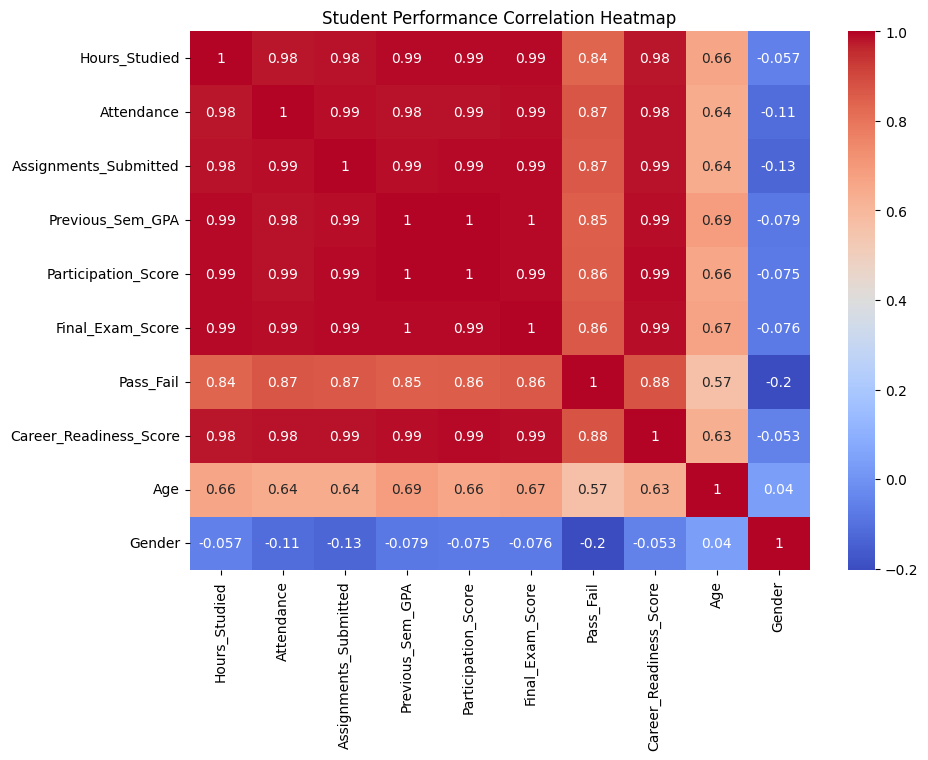

MSE: 7.252888878648133


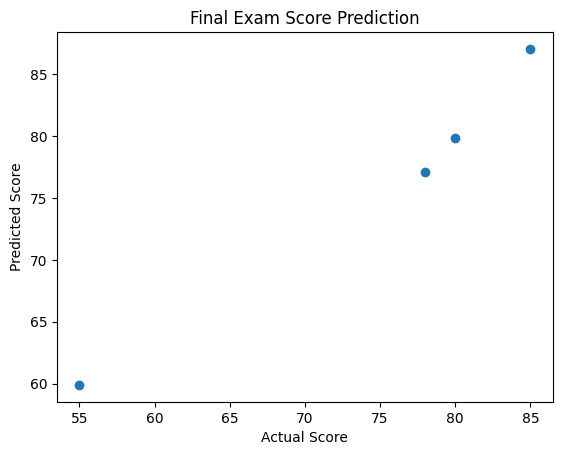

c:\Users\hp\Desktop\numpy\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\Desktop\numpy\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\Desktop\numpy\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



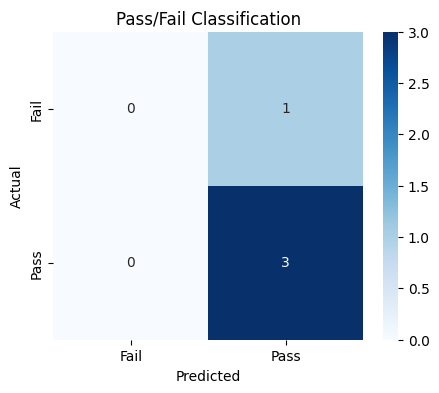

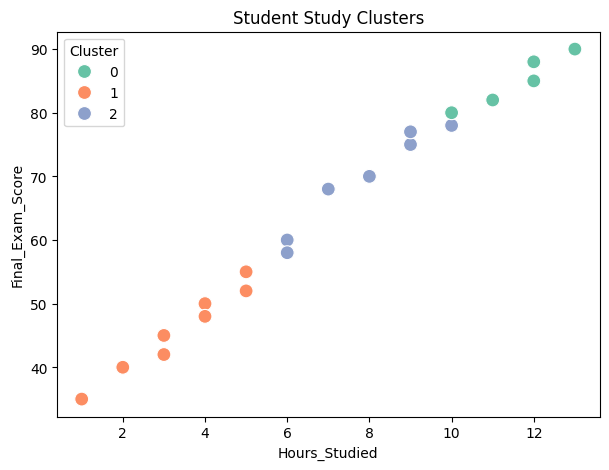

    Pass_Fail  Cluster               Recommendation
0           1        2   Skill Development Workshop
1           0        1  Extra Tutoring + Counseling
2           1        0   Advanced Career Mentorship
3           0        1  Extra Tutoring + Counseling
4           1        2   Skill Development Workshop
5           1        2   Skill Development Workshop
6           0        1  Extra Tutoring + Counseling
7           1        0   Advanced Career Mentorship
8           0        1  Extra Tutoring + Counseling
9           1        2   Skill Development Workshop
10          1        2   Skill Development Workshop
11          0        1  Extra Tutoring + Counseling
12          1        0   Advanced Career Mentorship
13          1        2   Skill Development Workshop
14          0        1  Extra Tutoring + Counseling
15          1        0   Advanced Career Mentorship
16          0        1  Extra Tutoring + Counseling
17          1        0   Advanced Career Mentorship
18          

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score,confusion_matrix

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans

df = pd.read_csv(
    r"C:\Users\hp\Desktop\numpy\Machine Learning\Student_Success_&_Career_Path.csv"
)

print(df.head())
print(df.info())

df = df.drop("Student_ID", axis=1)
df = df.rename(columns={"Attendance (%)": "Attendance"})
df["Gender"] = df["Gender"].map({"Male":0, "Female":1})
df["Pass_Fail"] = df["Pass_Fail"].map({"Fail":0, "Pass":1})


df = df.copy()

df.fillna(df.median(numeric_only=True), inplace=True)

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
 
   
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Student Performance Correlation Heatmap")
plt.show()

#Regeression
X_reg = df.drop(["Final_Exam_Score", "Pass_Fail"], axis=1)
y_reg = df["Final_Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

y_pred_reg = model_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_reg))

plt.scatter(y_test, y_pred_reg)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Final Exam Score Prediction")
plt.show()


#Classification
X_cls = df.drop(["Pass_Fail", "Final_Exam_Score"], axis=1)
y_cls = df["Pass_Fail"]

X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_cls = LogisticRegression()
model_cls.fit(X_train_scaled, y_train)

y_pred_cls = model_cls.predict(X_test_scaled)

print(classification_report(y_test, y_pred_cls))

plt.figure(figsize=(5,4))

sns.heatmap(
    confusion_matrix(y_test, y_pred_cls),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Fail","Pass"],
    yticklabels=["Fail","Pass"]
)

plt.title("Pass/Fail Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#K - Means Clustering
X_cluster = df.drop(["Pass_Fail"], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(7,5))

sns.scatterplot(
    x=df["Hours_Studied"],
    y=df["Final_Exam_Score"],
    hue=df["Cluster"],
    palette="Set2",
    s=100
)

plt.title("Student Study Clusters")
plt.show()

def recommend(row):
    if row["Pass_Fail"] == 0:
        return "Extra Tutoring + Counseling"
    elif row["Cluster"] == 0:
        return "Advanced Career Mentorship"
    else:
        return "Skill Development Workshop"

df["Recommendation"] = df.apply(recommend, axis=1)

print(df[["Pass_Fail","Cluster","Recommendation"]])